In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import scipy.stats as sp
import seaborn as sns
from scipy.stats.stats import pearsonr
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.formula.api as smf

In [2]:
data_er=pd.read_excel("Data_COMP5212project.xlsx",sheet_name="ER",index_col="Date")
print(data_er.head(5))

            USD_CNY  USD_JPY  EUR_USD  USD_CAD  AUD_USD  USD_CHF  GBP_USD
Date                                                                     
1999-01-01   8.2778   116.32   1.1366   1.5105   0.6305   1.4160   1.6458
1999-02-01   8.2790   119.17   1.1025   1.5080   0.6188   1.4463   1.6030
1999-03-01   8.2800   118.86   1.0770   1.5080   0.6347   1.4825   1.6107
1999-04-01   8.2790   119.49   1.0570   1.4565   0.6615   1.5255   1.6095
1999-05-01   8.2784   121.52   1.0423   1.4739   0.6488   1.5272   1.6030


In [3]:
data_v=pd.read_excel("Data_COMP5212project.xlsx",sheet_name="Variables", index_col="Date")
print(data_v.head(5))

            Shanghai    SP500  Nikkei225  EuroStoxx50    SPTSX  SPASX200  \
Date                                                                       
1999-01-01   1134.67  1279.64   14499.25          NaN  6729.56    2781.7   
1999-02-01   1090.09  1238.33   14367.54          NaN  6312.69    2768.4   
1999-03-01   1158.05  1286.37   15836.59          NaN  6597.79    2867.0   
1999-04-01   1120.93  1335.18   16701.53          NaN  7014.70    3027.8   
1999-05-01   1279.33  1301.84   16111.65          NaN  6841.80    2831.9   

               SMI  FT100  GoldPrice  BrentOilFutures  ...  STINT_CHE  \
Date                                                   ...              
1999-01-01  7201.2    NaN      286.3            11.35  ...    1.27167   
1999-02-01  7063.8    NaN      287.5            10.88  ...    1.26167   
1999-03-01  7130.2    NaN      279.8            15.24  ...    1.24833   
1999-04-01  7335.5    NaN      286.8            16.57  ...    0.99333   
1999-05-01  6911.6    NaN    

In [4]:
df_all=data_er.join(data_v)

In [5]:
df_all.tail()

,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,Shanghai,SP500,Nikkei225,...,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,6.6927,104.64,1.1647,1.3317,0.7026,0.9167,1.2941,3224.53,3269.96,22977.13,...,-0.7666,0.05,NaN,0.79,0.040,0.0005,0.602857,0.82,-0.518,0.3058
2020-11-01,6.5789,104.27,1.1928,1.3000,0.7345,0.9090,1.3321,3391.76,3621.63,26433.62,...,-0.7840,0.04,NaN,0.87,0.030,-0.0553,0.688500,0.87,-0.509,0.3836
2020-12-01,6.5250,103.24,1.2213,1.2730,0.7694,0.8851,1.3673,3473.07,3756.07,27444.17,...,-0.7638,0.03,NaN,0.93,0.020,-0.0915,0.730952,0.98,-0.525,0.3224
2021-01-01,6.4250,104.68,1.2136,1.2777,0.7642,0.8903,1.3702,3483.07,3714.24,27663.39,...,-0.7600,0.03,NaN,1.08,0.055,-0.0636,0.805500,1.05,-0.450,0.3672
2021-02-01,6.4730,106.58,1.2074,1.2739,0.7705,0.9082,1.3932,3509.08,3811.15,28966.01,...,-0.7500,0.05,NaN,1.26,0.150,0.0668,1.099474,1.32,-0.230,NaN


In [6]:
results = smf.ols('EUR_USD.diff(1) ~  SP500.diff(1) + EuroStoxx50.diff(1) + GoldPrice.diff(1) + BrentOilFutures.diff(1) + CPI_USA.diff(1) + CPI_EU.diff(1) + STINT_USA.diff(1) + STINT_EA19.diff(1) + LTINT_USA.diff(1) + LTINT_EA19.diff(1)', data=df_all).fit()
print(results.summary())

results = smf.ols('EUR_USD ~  SP500 + EuroStoxx50 + GoldPrice + BrentOilFutures + CPI_USA + CPI_EU + STINT_USA + STINT_EA19 + LTINT_USA + LTINT_EA19', data=df_all).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        EUR_USD.diff(1)   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     8.203
Date:                Sat, 01 May 2021   Prob (F-statistic):           4.59e-11
Time:                        10:45:47   Log-Likelihood:                 435.11
No. Observations:                 208   AIC:                            -848.2
Df Residuals:                     197   BIC:                            -811.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

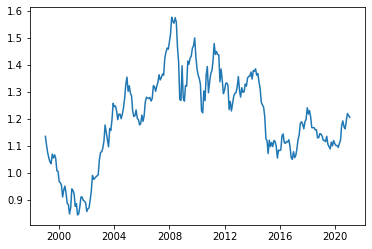

In [7]:
plt.plot(df_all["EUR_USD"])

In [8]:
df_usdeu=df_all[['EUR_USD', 'SP500','EuroStoxx50','GoldPrice','BrentOilFutures', 'CPI_USA', 'CPI_EU', 'STINT_USA', 'STINT_EA19', 'LTINT_USA', 'LTINT_EA19']]

#add 1st differenced data
df_usdeu['EUR_USD_diff']=df_usdeu['EUR_USD'].diff(1)
df_usdeu['SP500_diff']=df_usdeu['SP500'].diff(1)
df_usdeu['EuroStoxx50_diff']=df_usdeu['EuroStoxx50'].diff(1)
df_usdeu['GoldPrice_diff']=df_usdeu['GoldPrice'].diff(1)
df_usdeu['BrentOilFutures_diff']=df_usdeu['BrentOilFutures'].diff(1)

df_usdeu['CPI_USA_diff']=df_usdeu['CPI_USA'].diff(1)
df_usdeu['CPI_EU_diff']=df_usdeu['CPI_EU'].diff(1)

df_usdeu['STINT_USA_diff']=df_usdeu['STINT_USA'].diff(1)
df_usdeu['STINT_EA19_diff']=df_usdeu['STINT_EA19'].diff(1)
df_usdeu['STINT_USA_EA19']=df_usdeu['STINT_USA']-df_usdeu['STINT_EA19']
df_usdeu['STINT_USA_EA19_diff']=df_usdeu['STINT_USA_diff']-df_usdeu['STINT_EA19_diff']

df_usdeu['LTINT_USA_diff']=df_usdeu['LTINT_USA'].diff(1)
df_usdeu['LTINT_EA19_diff']=df_usdeu['LTINT_EA19'].diff(1)
df_usdeu['LTINT_USA_EA19']=df_usdeu['LTINT_USA']-df_usdeu['LTINT_EA19']
df_usdeu['LTINT_USA_EA19_diff']=df_usdeu['LTINT_USA_diff']-df_usdeu['LTINT_EA19_diff']

df_usdeu.dropna(inplace=True)
print(df_usdeu.tail())
#print(df_usdeu.iloc[:,0])

results = smf.ols('EUR_USD ~   SP500 + EuroStoxx50 + BrentOilFutures + GoldPrice+ CPI_USA + CPI_EU + STINT_USA + STINT_EA19 + LTINT_USA + LTINT_EA19 + STINT_USA_EA19 + LTINT_USA_EA19', data=df_usdeu).fit()
#results = smf.ols('EUR_USD ~   SP500_diff + EuroStoxx50_diff + BrentOilFutures_diff + GoldPrice_diff + CPI_USA_diff + CPI_EU_diff +  STINT_USA_EA19 + LTINT_USA_EA19', data=df_usdeu).fit()
print(results.summary())

            EUR_USD    SP500  EuroStoxx50  GoldPrice  BrentOilFutures  \
Date                                                                    
2020-09-01   1.1718  3363.00      3193.61     1907.8            40.95   
2020-10-01   1.1647  3269.96      2958.21     1892.4            37.46   
2020-11-01   1.1928  3621.63      3492.54     1784.8            47.59   
2020-12-01   1.2213  3756.07      3552.64     1899.6            51.80   
2021-01-01   1.2136  3714.24      3481.44     1850.3            55.88   

             CPI_USA  CPI_EU  STINT_USA  STINT_EA19  LTINT_USA  ...  \
Date                                                            ...   
2020-09-01  109.8149  105.73       0.13     -0.4914       0.68  ...   
2020-10-01  109.8605  105.92       0.12     -0.5091       0.79  ...   
2020-11-01  109.7934  105.63       0.16     -0.5209       0.87  ...   
2020-12-01  109.8968  105.97       0.17     -0.5381       0.93  ...   
2021-01-01  110.3642  106.27       0.14     -0.5472       1.08

/Users/brianyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/brianyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/brianyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

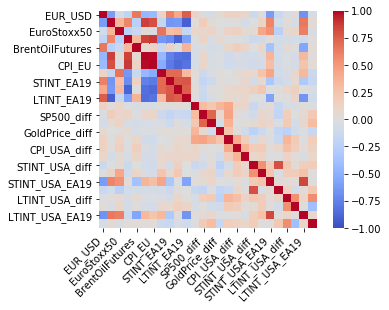

In [9]:
# correlation matrix and heatmap
corr_usdeu=df_usdeu.corr()
#print(corr_usdeu)
ax = sns.heatmap(
    corr_usdeu, 
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
df_usdeu.dropna(inplace=True)
usdeu_y=df_usdeu['EUR_USD']
#usdeu_x=df_usdeu.drop('EUR_USD', axis=1)
usdeu_x=df_usdeu[['SP500_diff','EuroStoxx50_diff','GoldPrice_diff','BrentOilFutures_diff','CPI_USA','CPI_EU','STINT_USA_EA19','LTINT_USA_EA19']]
test_size=0.5
usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = test_size, shuffle=False )

print(len(usdeu_x_train))
print(len(usdeu_x_test))
print(len(usdeu_y_train))
print(len(usdeu_y_test))

104
104
104
104


/Users/brianyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Random forest regressor

Mean Absolute Error: 0.16 degrees.
MAE: 0.15517493779761996
MSE: 0.03122342192597451
RMSE: 0.1767015051604669
R-squared:  -2.466316814319516
Accuracy: 86.32 %.


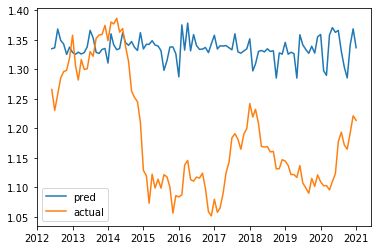

In [11]:
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0) 

regressor.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions_rf = regressor.predict(usdeu_x_test)

# Calculate the absolute errors
errors = abs(predictions_rf - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, predictions_rf))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, predictions_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, predictions_rf)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, predictions_rf)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

predictions_rf=pd.Series(predictions_rf,index=usdeu_y_test.index)
plt.plot(predictions_rf)
plt.plot(usdeu_y_test)
plt.legend(["pred","actual"])
plt.show()

In [12]:
df_len=len(df_usdeu)
#print(df_len)
#print(len(usdeu_y))
start_pred_pos = int(df_len*(1-test_size))
#print(start_pred_pos)
RFR_prediction=[]
for i in range(start_pred_pos-1, df_len-1):
    #print(i) # the result is 146 to 208
    #regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
    RFR=RandomForestRegressor(n_estimators = 50, random_state = 0).fit(df_usdeu[:i], usdeu_y[1:i+1])#using the one step befroe index to predict next rate 
    #print(df_usdeu[:i])
    # #print(len(df_usdeu[:i])) #result is 208
    RFR_pred=RFR.predict(df_usdeu[i:i+1])

    RFR_prediction.append(RFR_pred[0])# to add an item to the end of the list i.e. 146+1 until 208
    
RFR_prediction=pd.Series(RFR_prediction,index=usdeu_y_test.index)

104
104


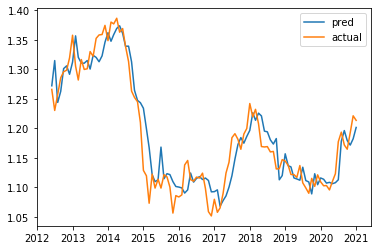

Mean Absolute Error: 0.02 degrees.
MAE: 0.024250726732295447
MSE: 0.001035033773729104
RMSE: 0.03217194078275515
R-squared:  0.8850941135865332
Accuracy: 97.94 %.


Text(0, 0.5, 'Predictions')

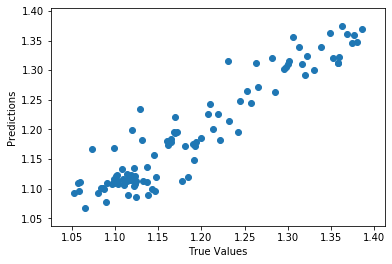

In [13]:
print(len(RFR_prediction))
print(len(usdeu_y_test))
plt.plot(RFR_prediction)
plt.plot(usdeu_y_test)
plt.legend(["pred","actual"])
plt.show()
errors=RFR_prediction-usdeu_y_test
AE=abs(errors)

# Calculate the absolute errors
errors = abs(RFR_prediction - usdeu_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, RFR_prediction))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, RFR_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, RFR_prediction)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, RFR_prediction)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_test, RFR_prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")

MAE: 0.019536538461538466
MSE: 0.0006113505769230772
RMSE: 0.02472550458379115
R-squared:  0.9321299635492704
Accuracy: 98.35 %.


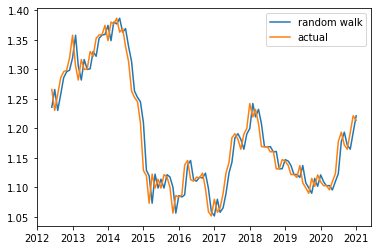

In [14]:
#random walk model without drift
eurusd_pred_rw = df_usdeu["EUR_USD"].shift(1)
errors_rw = eurusd_pred_rw[start_pred_pos:] - df_usdeu["EUR_USD"][start_pred_pos:]
plt.plot(eurusd_pred_rw[start_pred_pos:])
plt.plot(df_usdeu["EUR_USD"][start_pred_pos:])
plt.legend(["random walk","actual"]) 
#print(errors_rw)

AE_rw=abs(errors_rw)

print('MAE:', metrics.mean_absolute_error(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:]))
print('MSE:', metrics.mean_squared_error(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:])))
print ('R-squared: ',metrics.r2_score(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:])) 

# Calculate mean absolute percentage error (MAPE)
mape_rw = 100 * (AE_rw / df_usdeu["EUR_USD"][start_pred_pos:])
# Calculate and display accuracy
accuracy_rw = 100 - np.mean(mape_rw)
print('Accuracy:', np.round(accuracy_rw, 2), '%.')

In [15]:
#DM tests
from dm_test import dm_test
rt = dm_test(pd.to_numeric(usdeu_y_test),pd.to_numeric(eurusd_pred_rw[start_pred_pos:]),pd.to_numeric(RFR_prediction), h = 1, crit="MSE")
print(rt)
#p-vale<0.1 meaning that the linear predictions are statiscally different from those of random walk .

dm_return(DM=-3.1400971245869043, p_value=0.0022043192493839603)


In [16]:
Pred_GoingUp=RFR_prediction>df_usdeu["EUR_USD"][start_pred_pos-1:].shift(1)[1:]*(1.002)
actual_GoingUP=usdeu_y_test>df_usdeu["EUR_USD"][start_pred_pos-1:].shift(1)[1:]
print("going up or down accuracy: ",(Pred_GoingUp==actual_GoingUP).mean())
print("proportion of days of going up: ",actual_GoingUP.mean())

from dateutil.relativedelta import relativedelta

#print(df_usdeu["EUR_USD"][start_pred_pos-1:].shift(1)[1:])
#print(Pred_GoingUp)
#print(actual_GoingUP)
#print(len(Pred_GoingUp))
#print(len(lin_preds_1))
#print(usdeu_y_test.shift(1))
#print(usdeu_y_test)
#print(lin_preds_1)

going up or down accuracy:  0.5
proportion of days of going up:  0.49038461538461536


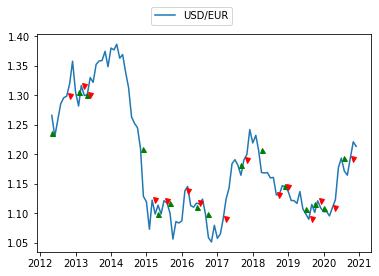

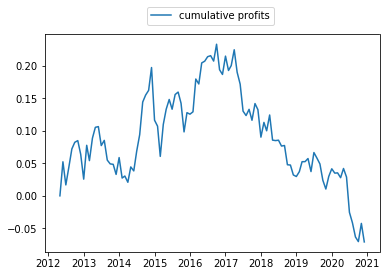

In [17]:
#long a contract if the price is predicted to go up
#short a contract if the price is predicted to go down

from dateutil.relativedelta import relativedelta

cost_ratio=0.002  # 0.002 means 0.2% transaction cost
profits=[]
buy_signal=[]
sell_signal=[]
signals=[]
buy_prices=[]
sell_prices=[]

#initial condition
if Pred_GoingUp[0]==1:
  buy_signal.append(Pred_GoingUp.index[0]-relativedelta(months=1))
  #signals.append(1)
  buy_price=df_usdeu["EUR_USD"][buy_signal[-1]]
  buy_prices.append(buy_price)
  #print(buy_price)
if Pred_GoingUp[0]==0:
  sell_signal.append(Pred_GoingUp.index[0]-relativedelta(months=1))
  #signals.append(-1)
  sell_price=df_usdeu["EUR_USD"][sell_signal[-1]]
  sell_prices.append(sell_price)
  #print(sell_price)

profits.append(0)

#after the initial value
for i in range(1,len(Pred_GoingUp)):
  #long
  if Pred_GoingUp[i-1]==0 and Pred_GoingUp[i]==1 :
    buy_signal.append(Pred_GoingUp.index[i-1])
    signals.append(1)
    buy_price=df_usdeu["EUR_USD"][buy_signal[-1]]
    buy_prices.append(buy_price)
    profits.append((df_usdeu["EUR_USD"][Pred_GoingUp.index[i-2]]-df_usdeu["EUR_USD"][Pred_GoingUp.index[i-1]])*(1-2*cost_ratio))
  #short  
  if Pred_GoingUp[i-1]==1 and Pred_GoingUp[i]==0 :
    sell_signal.append(Pred_GoingUp.index[i-1])
    signals.append(-1)
    sell_price=df_usdeu["EUR_USD"][sell_signal[-1]]
    sell_prices.append(sell_price)
    profits.append((df_usdeu["EUR_USD"][Pred_GoingUp.index[i-1]]-df_usdeu["EUR_USD"][Pred_GoingUp.index[i-2]])*(1-2*cost_ratio))
    
  #hold  
  if (Pred_GoingUp[i-1]==1 and Pred_GoingUp[i]==1):
    signals.append(0)
    profits.append(df_usdeu["EUR_USD"][Pred_GoingUp.index[i-1]]-df_usdeu["EUR_USD"][Pred_GoingUp.index[i-2]])
    
  if (Pred_GoingUp[i-1]==0 and Pred_GoingUp[i]==0):
    signals.append(0)
    profits.append(df_usdeu["EUR_USD"][Pred_GoingUp.index[i-2]]-df_usdeu["EUR_USD"][Pred_GoingUp.index[i-1]])


cum_profits=np.cumsum(profits)
cum_profits=pd.Series(cum_profits,index=df_usdeu["EUR_USD"][start_pred_pos-1:-1].index)
#print(usdeu_y_test[buy_signal])
#print(sell_signal)
#print(Pred_GoingUp)
#print(df_usdeu["EUR_USD"][start_pred_pos-1:-1])

#buy_signal.pop(0)

plt.plot(df_usdeu["EUR_USD"][start_pred_pos-1:-1].index,usdeu_y_test.values)
plt.legend(["USD/EUR"],bbox_to_anchor =(0.6, 1.15), ncol = 2)
plt.plot(buy_signal,df_usdeu["EUR_USD"][start_pred_pos-1:-1][buy_signal],'^', markersize=5, color='g')
plt.plot(sell_signal,df_usdeu["EUR_USD"][start_pred_pos-1:-1][sell_signal],'v', markersize=5, color='r')
plt.show()


plt.plot(df_usdeu["EUR_USD"][start_pred_pos-1:-1].index,cum_profits.values)
plt.legend(["cumulative profits"],bbox_to_anchor =(0.7, 1.15), ncol = 2)
plt.show()


In [18]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

In [34]:

series = df_usdeu['EUR_USD']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/brianyu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/brianyu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.EUR_USD   No. Observations:                  207
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 398.460
Method:                       css-mle   S.D. of innovations              0.035
Date:                Sat, 01 May 2021   AIC                           -782.920
Time:                        10:59:32   BIC                           -759.591
Sample:                    11-01-2003   HQIC                          -773.486
                         - 01-01-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0003      0.003      0.123      0.902      -0.005       0.006
ar.L1.D.EUR_USD    -0.0071      0.070     -0.102      0.919      -0.143       0.129
ar.L2.D.EUR_USD    -0.0002      

Test MSE: 0.001
Mean Absolute Error: 0.05 degrees.
MAE: 0.01939050645157984
MSE: 0.0005806363929246754
RMSE: 0.02409639792426817
R-squared:  0.7143079796817107
Accuracy: 95.53 %.


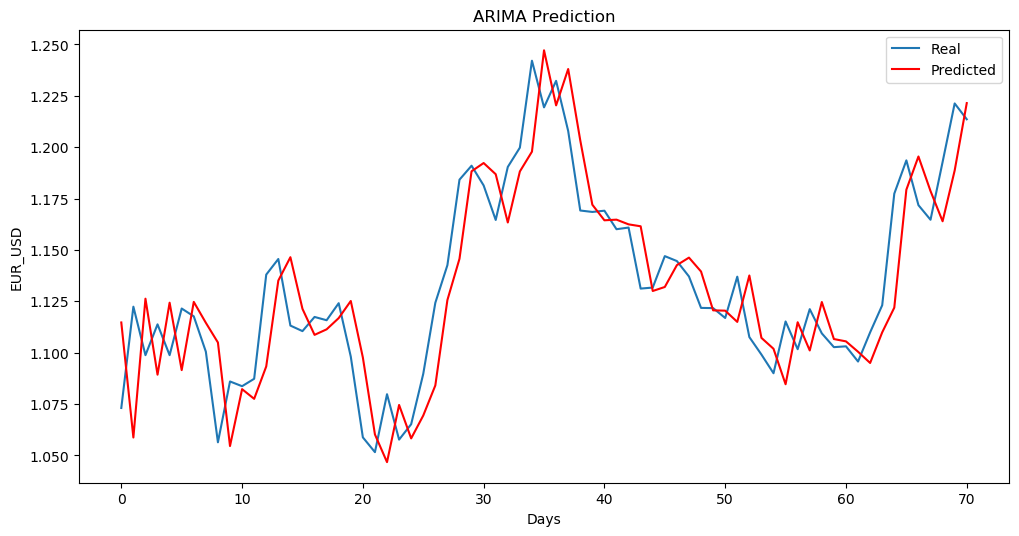

In [35]:

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions_2 = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_2.append(yhat)
    obs = test[t]
    history.append(obs)
    
error = mean_squared_error(test, predictions_2)
print('Test MSE: %.3f' % error)


# Calculate the absolute errors
errors = abs(predictions_2 - test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(test, predictions_2))
print('MSE:', metrics.mean_squared_error(test, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test, predictions_2)))
print ('R-squared: ',metrics.r2_score(test, predictions_2)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions_2, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('EUR_USD')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler().fit(df_usdeu.iloc[:, 0:1].astype('float32')) # Close index
df_log = minmax.transform(df_usdeu.iloc[:, 0:1].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.203119
1,0.281095
2,0.394066
3,0.371434
4,0.375428


In [53]:
#Split train and test

test_size = 30
simulation_size = 1

df_train = df_log.iloc[:-test_size]
df_test = df_log.iloc[-test_size:]
df_usdeu.shape, df_train.shape, df_test.shape

((208, 26), (178, 1), (30, 1))

In [54]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.GRUCell(size_layer)

        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )
        
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [55]:
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
future_day = test_size
learning_rate = 0.01

In [56]:
from tqdm import tqdm
from datetime import timedelta

def forecast():
    tf.reset_default_graph()
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], dropout_rate
    )
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    date_ori = pd.to_datetime(df_usdeu.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc = 'train loop')
    for i in pbar:
        init_value = np.zeros((1, num_layers * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.expand_dims(
                df_train.iloc[k : index, :].values, axis = 0
            )
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            logits, last_state, _, loss = sess.run(
                [modelnn.logits, modelnn.last_state, modelnn.optimizer, modelnn.cost],
                feed_dict = {
                    modelnn.X: batch_x,
                    modelnn.Y: batch_y,
                    modelnn.hidden_layer: init_value,
                },
            )        
            init_value = last_state
            total_loss.append(loss)
            total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
        pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))
    
    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value = np.zeros((1, num_layers * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(
                    df_train.iloc[k : k + timestamp], axis = 0
                ),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[k + 1 : k + timestamp + 1] = out_logits

    if upper_b != df_train.shape[0]:
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(days = 1))

    init_value = last_state
    
    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(o, axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[-future_day + i] = out_logits[-1]
        date_ori.append(date_ori[-1] + timedelta(days = 1))
    
    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.3)
    
    return deep_future[-test_size:]

In [57]:
import tensorflow as tf
results = []
for i in range(simulation_size):
    print('simulation %d'%(i + 1))
    results.append(forecast())

simulation 1


/Users/brianyu/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [00:35<00:00,  8.56it/s, acc=92.7, cost=0.0116] 


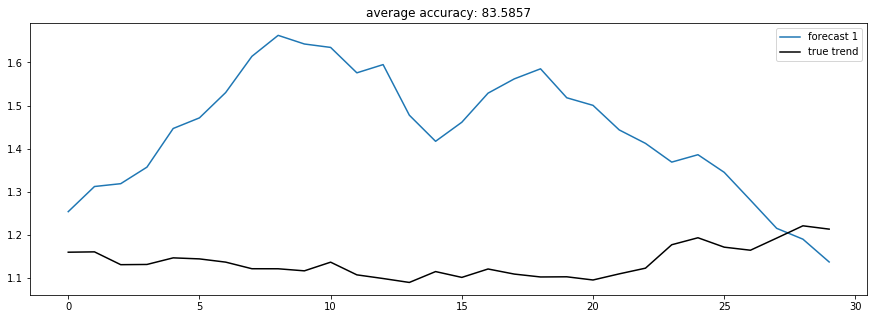

In [58]:
accuracies = [calculate_accuracy(df_usdeu['EUR_USD'].iloc[-test_size:].values, r) for r in results]

plt.figure(figsize = (15, 5))
for no, r in enumerate(results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df_usdeu['EUR_USD'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))
plt.show()



In [59]:
Predictions=df_usdeu['EUR_USD'].iloc[-test_size:].values
Real= results

errors = abs(Predictions - Real)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

for r in (results):
    MAE=metrics.mean_absolute_error(r, Predictions)
    print('MAE:', MAE)
    
    MSE=metrics.mean_squared_error(r, Predictions)
    print('MSE:', MSE)
    
    RMSE=np.sqrt(metrics.mean_squared_error(r, Predictions))
    print('RMSE:', RMSE)
    
    R2=metrics.r2_score(r, Predictions)
    print('R-squared:', R2)
    
#print('MAE:', metrics.mean_absolute_error(Real, Predictions))
#print('MSE:', metrics.mean_squared_error(Real, Predictions))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(Real, Predictions)))
#print('R-squared: ',metrics.r2_score(Real, Predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Real)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.31 degrees.
MAE: 0.31131312522377047
MSE: 0.12084155042663136
RMSE: 0.3476227127600142
R-squared: -5.181616592195479
Accuracy: 79.27 %.
